# Credit Analytics

In [3]:
#importing librabries and loading data
#Input and output features
#DATA Exploration
import pandas

#-- load in the data
data = pandas.read_csv("credit_card_history (1).csv")

#the features
X = data[data.columns[:-1]]
Y = data[data.columns[-1]]

print("Number of datapoints:", X.shape[0])
print("Number of input features:", X.shape[1])

Number of datapoints: 30000
Number of input features: 23


In [4]:
data.head(5)

,LIMIT,SEX,EDUCATION,MARRIAGE,AGE,STATUS_JAN,STATUS_FEB,STATUS_MAR,STATUS_APR,STATUS_MAY,...,BILL_APR,BILL_MAY,BILL_JUN,PAY_JAN,PAY_FEB,PAY_MAR,PAY_APR,PAY_MAY,PAY_JUN,DEFAULTED
0,500,2,2,1,24,2,2,-1,-1,-2,...,0.000,0.000,0.000,0.000,16.536,0.0,0.000,0.000,0.0,1
1,2900,2,2,2,26,-1,2,0,0,0,...,78.528,82.920,78.264,0.000,24.000,24.0,24.000,0.000,48.0,1
2,1700,1,2,2,30,1,2,2,0,0,...,1602.768,867.288,885.456,76.800,0.000,72.0,72.000,36.000,0.0,1
3,500,1,1,2,24,0,0,2,2,2,...,440.112,429.720,458.496,76.800,0.000,36.0,0.000,39.600,0.0,1
4,2900,2,2,1,39,-1,-1,-1,-1,-1,...,0.000,15.168,7.584,7.584,7.584,0.0,15.168,7.584,0.0,1


In [6]:
data.dtypes

LIMIT           int64
SEX             int64
EDUCATION       int64
MARRIAGE        int64
AGE             int64
STATUS_JAN      int64
STATUS_FEB      int64
STATUS_MAR      int64
STATUS_APR      int64
STATUS_MAY      int64
STATUS_JUN      int64
BILL_JAN      float64
BILL_FEB      float64
BILL_MAR      float64
BILL_APR      float64
BILL_MAY      float64
BILL_JUN      float64
PAY_JAN       float64
PAY_FEB       float64
PAY_MAR       float64
PAY_APR       float64
PAY_MAY       float64
PAY_JUN       float64
DEFAULTED       int64
dtype: object

In [8]:
# FICO categorizations
demographics = data.columns[0:5]
statuses = data.columns[5:11]
bills = data.columns[11:17]
payments = data.columns[17:23]

data[statuses].head(10)

,STATUS_JAN,STATUS_FEB,STATUS_MAR,STATUS_APR,STATUS_MAY,STATUS_JUN
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,1,2,2,0,0,2
3,0,0,2,2,2,2
4,-1,-1,-1,-1,-1,-1
5,2,0,0,2,2,2
6,-2,-2,-2,-2,-2,-2
7,1,-2,-1,-1,-1,-1
8,2,0,0,0,0,0
9,1,-1,-1,-2,-2,-2


In [9]:
data[demographics].head(5)

,LIMIT,SEX,EDUCATION,MARRIAGE,AGE
0,500,2,2,1,24
1,2900,2,2,2,26
2,1700,1,2,2,30
3,500,1,1,2,24
4,2900,2,2,1,39


[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


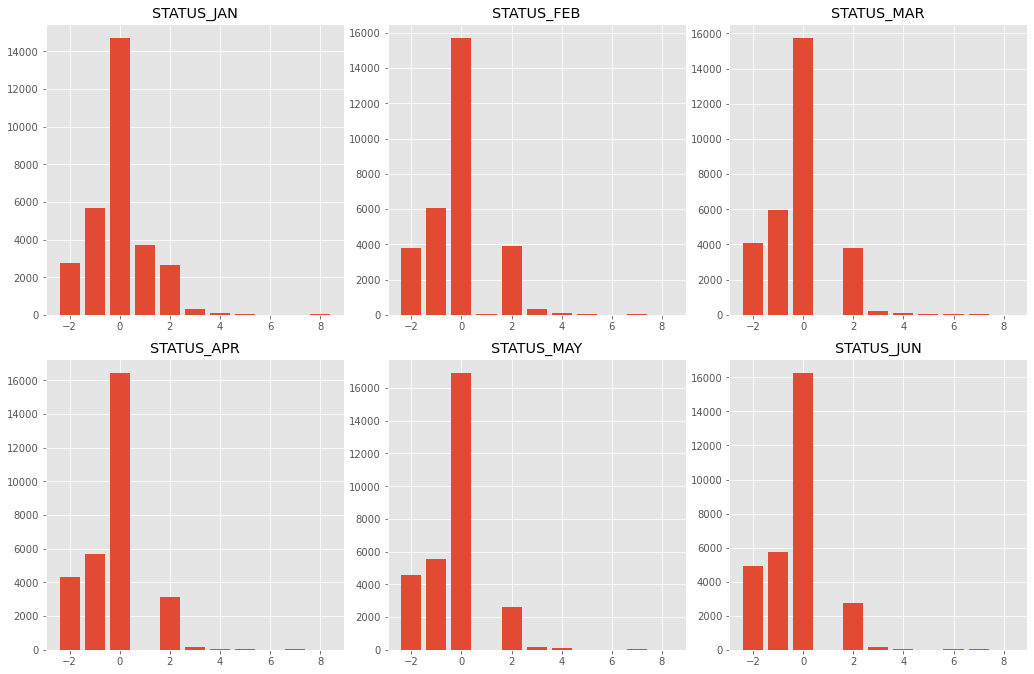

In [13]:
#Summarizing the data with Graphs
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')


plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams.update({'font.size': 10})


fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,10)

print(ax)


for i, feature in enumerate(statuses):

  
   counts  = data[feature].value_counts()

  
   row, col = int(i / 3), i % 3

   
   ax[row, col].bar(counts.index, counts, align='center')
   ax[row, col].set_title(feature)


plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

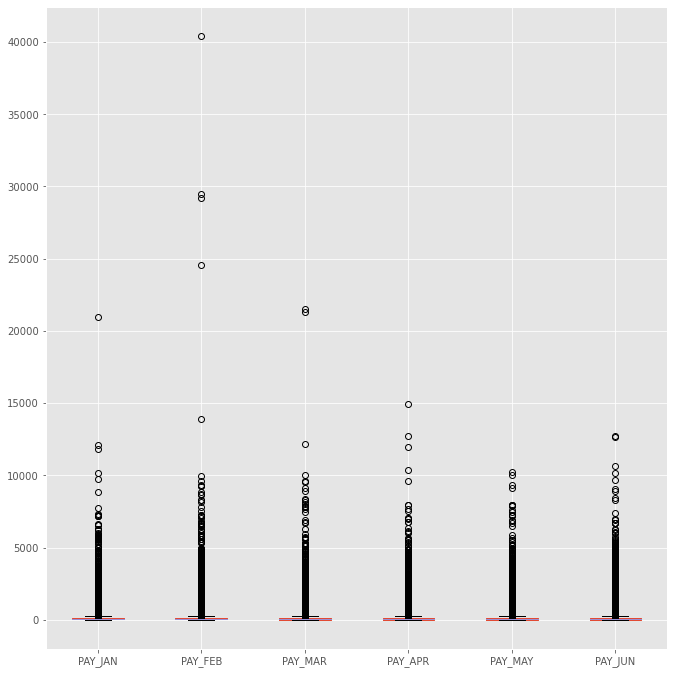

In [14]:

%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')


plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams.update({'font.size': 10})

fig.set_size_inches(10,5)

data[payments].boxplot()


plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

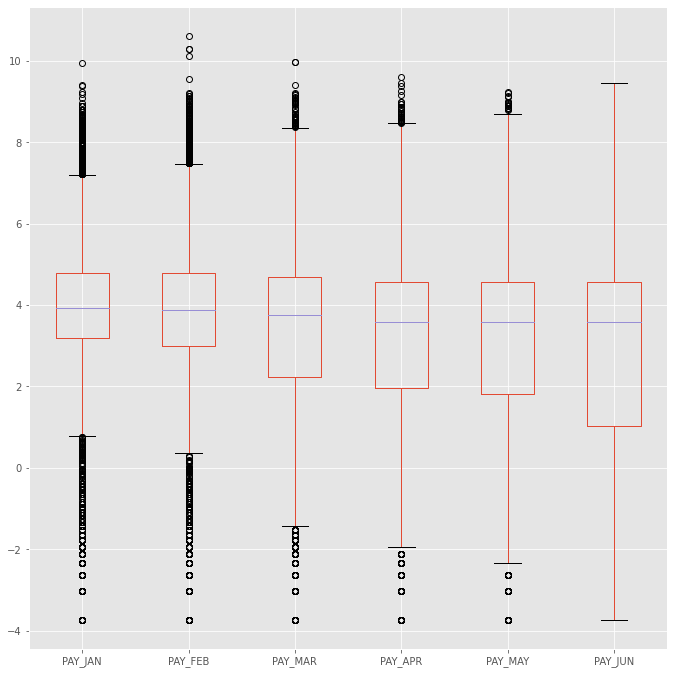

In [15]:
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams.update({'font.size': 10})

fig.set_size_inches(10,5)

import numpy as np
np.log(data[payments]).boxplot()


plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

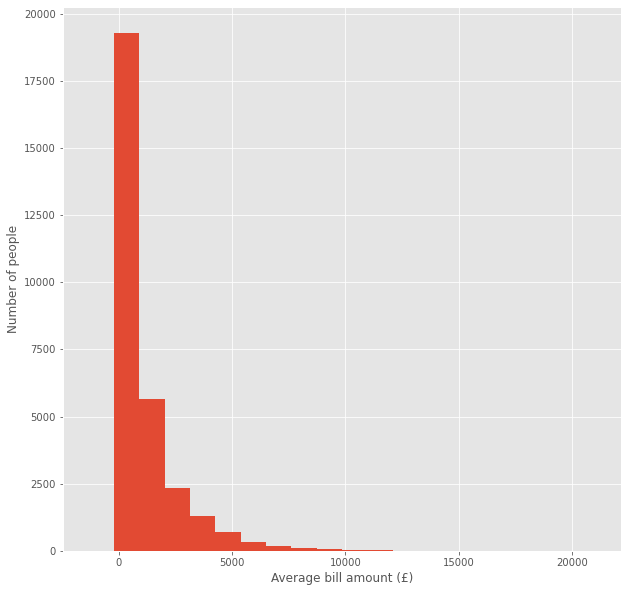

In [16]:
#for each person what's the average bill on their account each month?
plt.rcParams['figure.figsize'] = (10.0, 10.0)

#histogram line 
plt.hist(data[bills].mean(axis=1), 20)

#labelling.
plt.xlabel("Average bill amount (£)")
plt.ylabel("Number of people")
plt.show()

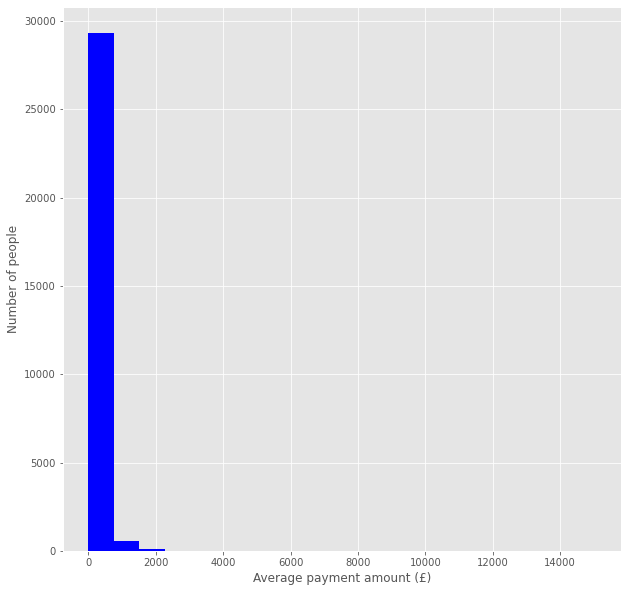

In [22]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)

plt.hist(data[payments].mean(axis=1), 20,color='Blue')

# labelling.
plt.xlabel("Average payment amount (£)")
plt.ylabel("Number of people")
plt.show()

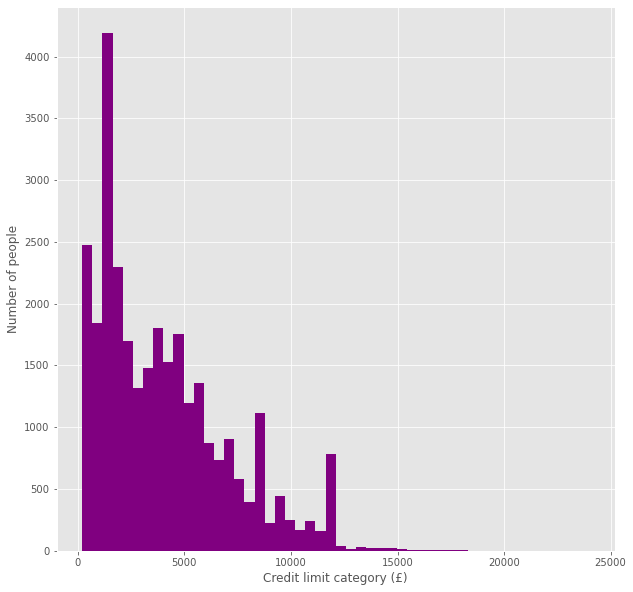

In [18]:
plt.hist(data["LIMIT"], bins=50, color='purple')
plt.xlabel("Credit limit category (£)")
plt.ylabel("Number of people")
plt.show()

Defaulting accounts are 22.12% out of 30000 observations


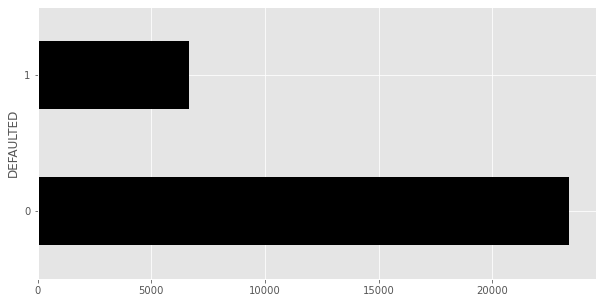

In [24]:
#: Explore the "DEFAULTED" Column
fig = plt.figure()
fig.set_size_inches(10,5)

d = data.groupby(['DEFAULTED']).size()

print("Defaulting accounts are {}% out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))

p = d.plot(kind='barh', color='Black')

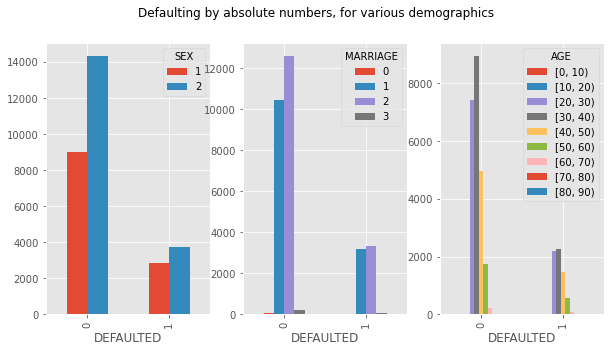

In [25]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(10,5)
fig.suptitle('Defaulting by absolute numbers, for various demographics')

# a plot for split by gender
d = data.groupby(['DEFAULTED', 'SEX']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

# plot for "MARRIAGE"
d = data.groupby(['DEFAULTED', 'MARRIAGE']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

#plot for split by "AGE"
data['AGE'] = pandas.cut(data['AGE'], range(0, 100, 10), right=False)
d = data.groupby(['DEFAULTED', 'AGE']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

In [26]:
#Feature Engineering
X['STATUS_MEAN'] = data[statuses].mean(axis=1)
X['STATUS_STD'] = data[statuses].std(axis=1)

X['BILL_MEAN'] = data[bills].mean(axis=1)
X['BILL_STD'] = data[bills].std(axis=1)

X['PAY_MEAN'] = data[payments].mean(axis=1)
X['PAY_STD'] = data[payments].std(axis=1)

X.describe()

,LIMIT,SEX,EDUCATION,MARRIAGE,AGE,STATUS_JAN,STATUS_FEB,STATUS_MAR,STATUS_APR,STATUS_MAY,...,PAY_MAR,PAY_APR,PAY_MAY,PAY_JUN,STATUS_MEAN,STATUS_STD,BILL_MEAN,BILL_STD,PAY_MEAN,PAY_STD
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4016.316667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,125.416356,115.825845,115.185303,125.172062,-0.182439,0.454326,1079.446685,289.866901,126.605570,139.318044
std,3113.527887,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,422.567075,375.987834,366.679336,426.659179,0.982176,0.516221,1518.257325,487.251580,243.310712,360.154535
min,200.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,-1345.036000,0.000000,0.000000,0.000000
25%,1200.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,9.360000,7.104000,6.060000,2.826000,-0.833333,0.000000,114.752000,37.198445,26.719000,14.768488
50%,3400.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,43.200000,36.000000,36.000000,36.000000,0.000000,0.408248,505.244000,109.911892,57.532000,33.928659
75%,5800.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,108.120000,96.318000,96.756000,96.000000,0.000000,0.836660,1370.506000,344.454230,134.014000,99.046983
max,24000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,21504.960000,14904.000000,10236.696000,12687.984000,6.000000,3.204164,21055.532000,15546.913226,15056.264000,15602.360132


In [27]:
X.head(5)

,LIMIT,SEX,EDUCATION,MARRIAGE,AGE,STATUS_JAN,STATUS_FEB,STATUS_MAR,STATUS_APR,STATUS_MAY,...,PAY_MAR,PAY_APR,PAY_MAY,PAY_JUN,STATUS_MEAN,STATUS_STD,BILL_MEAN,BILL_STD,PAY_MEAN,PAY_STD
0,500,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.000,0.000,0.0,-0.333333,1.861899,30.816,42.279197,2.756,6.750794
1,2900,2,2,2,26,-1,2,0,0,0,...,24.0,24.000,0.000,48.0,0.500000,1.224745,68.308,15.311228,20.000,18.066544
2,1700,1,2,2,30,1,2,2,0,0,...,72.0,72.000,36.000,0.0,1.166667,0.983192,1354.740,370.886709,42.800,36.252448
3,500,1,1,2,24,0,0,2,2,2,...,36.0,0.000,39.600,0.0,1.333333,1.032796,424.644,30.340958,25.400,31.277596
4,2900,2,2,1,39,-1,-1,-1,-1,-1,...,0.0,15.168,7.584,0.0,-1.000000,0.000000,7.584,4.796543,6.320,5.709028


In [28]:
#Feature importance to avoid the curse of dimensionality.
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k= 5)

selector_ft = selector.fit_transform(X, Y)

In [29]:
print(selector.scores_)

[7.23454111e+02 4.79788543e+01 2.35471118e+01 1.77812714e+01
 5.78855582e+00 3.53771497e+03 2.23916914e+03 1.75746644e+03
 1.47684597e+03 1.30459118e+03 1.08540249e+03 1.15805315e+01
 6.04423789e+00 5.94438771e+00 3.09474518e+00 1.37108740e+00
 8.65820292e-01 1.60403810e+02 1.03291524e+02 9.52180109e+01
 9.71880005e+01 9.14298008e+01 8.50890453e+01 2.59075319e+03
 1.98152735e+03 4.83257470e+00 1.92457893e+02 3.17598973e+02
 1.65291839e+02]


In [30]:
import numpy as np
import pandas as pd

scores= selector.scores_
names_scores = list(zip(X.columns, scores))

ns_df = pd.DataFrame(data = names_scores, columns= ['Feature name','F-Score'])
ns_df_sorted = ns_df.sort_values(['F-Score','Feature name'], ascending = [False, True])[:20] #-- this creates an ordered dataframe of scores of the 20 best variables
print(ns_df_sorted)

   Feature name      F-Score
5    STATUS_JAN  3537.714970
23  STATUS_MEAN  2590.753192
6    STATUS_FEB  2239.169136
24   STATUS_STD  1981.527348
7    STATUS_MAR  1757.466444
8    STATUS_APR  1476.845967
9    STATUS_MAY  1304.591176
10   STATUS_JUN  1085.402485
0         LIMIT   723.454111
27     PAY_MEAN   317.598973
26     BILL_STD   192.457893
28      PAY_STD   165.291839
17      PAY_JAN   160.403810
18      PAY_FEB   103.291524
20      PAY_APR    97.188000
19      PAY_MAR    95.218011
21      PAY_MAY    91.429801
22      PAY_JUN    85.089045
1           SEX    47.978854
2     EDUCATION    23.547112


Predictive models

In [31]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import dummy
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


folds = KFold(n_splits=10, shuffle=True, random_state=0)

In [32]:
lr = linear_model.LogisticRegression()
lr_scores = cross_val_score(lr, X, Y, cv=folds)
print("Mean LR Accuracy:", np.mean(lr_scores))

C:\Users\roshn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\roshn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean LR Accuracy: 0.7792666666666667


C:\Users\roshn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
print("Mean LR Accuracy:", np.mean(lr_scores))

Mean LR Accuracy: 0.7792666666666667


In [34]:
dt = tree.DecisionTreeClassifier(max_depth=20, min_samples_leaf=7)
dt_scores = cross_val_score(dt, X, Y, cv=folds)
print("Mean DT Accuracy:", np.mean(dt_scores))

Mean DT Accuracy: 0.7643666666666666


In [35]:
ab = ensemble.AdaBoostClassifier(n_estimators=300, learning_rate=1)
ab_scores = cross_val_score(ab, X, Y, cv=folds)
print("Mean AB Accuracy:", np.mean(ab_scores))

Mean AB Accuracy: 0.8178000000000001


In [36]:
dc = dummy.DummyClassifier()
dc_scores = cross_val_score(dc, X, Y, cv=folds)
print("Baseline Accuracy:", np.mean(dc_scores))

Baseline Accuracy: 0.7788


Statistical Testing

In [37]:
from scipy.stats import ttest_rel #p value remains lower than 0.05

stat, p = ttest_rel(dt_scores, ab_scores)
print(np.round(p, decimals= 4))

0.0


In [38]:
from scipy.stats import wilcoxon #p value remains lower than 0.05

stat, p = wilcoxon(lr_scores, ab_scores)
print(np.round(p, 4))

0.002
